In [3]:
# Import necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler

In [4]:

# Load the dataset
file_path = '/content/drive/MyDrive/archive (10)/database.csv'  # Update this with the correct file path
df = pd.read_csv(file_path)

<ipython-input-4-1a0d84385789>:3: DtypeWarning: Columns (5) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv(file_path)


In [5]:
# Display the first few rows of the dataset
print("Dataset Head:\n", df.head())

# Check for missing values column-wise
print("\nMissing Values per Column:\n", df.isnull().sum())

Dataset Head:
      Glacier ID Political Unit Continent Basin Code Location Code  \
0  AF5Q112B0001    AFGHANISTAN      ASIA       Q112            B0   
1  AF5Q112B0002    AFGHANISTAN      ASIA       Q112            B0   
2  AF5Q112B0003    AFGHANISTAN      ASIA       Q112            B0   
3  AF5Q112B0004    AFGHANISTAN      ASIA       Q112            B0   
4  AF5Q112B0005    AFGHANISTAN      ASIA       Q112            B0   

  Glacier Code Glacier Name  Latitude  Longitude  Primary Class  ...  \
0            1          NaN    34.672     68.874            9.0  ...   
1            2          NaN    34.676     68.855            9.0  ...   
2            3          NaN    34.689     68.854            9.0  ...   
3            4          NaN    34.707     68.857            9.0  ...   
4            5          NaN    34.719     68.852            9.0  ...   

   Maximum Length  Maximum Length Exposed  Maximum Length Ablation  \
0             1.9                     NaN                      NaN 

In [6]:
# Drop columns with too many missing values (e.g., >50% missing data)
threshold = 0.5
df = df.loc[:, df.isnull().mean() < threshold]

In [7]:
# Handle missing values
# Using SimpleImputer to fill missing numeric values with mean
numeric_columns = df.select_dtypes(include=[np.number]).columns
imputer = SimpleImputer(strategy='mean')
df[numeric_columns] = imputer.fit_transform(df[numeric_columns])

# Fill remaining missing values with forward fill for categorical columns
df.fillna(method='ffill', inplace=True)

# Ensure the dataset is not empty after handling missing values
if df.empty:
    raise ValueError("The dataset is empty after cleaning. Please check ")

<ipython-input-7-384afe097063>:8: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  df.fillna(method='ffill', inplace=True)


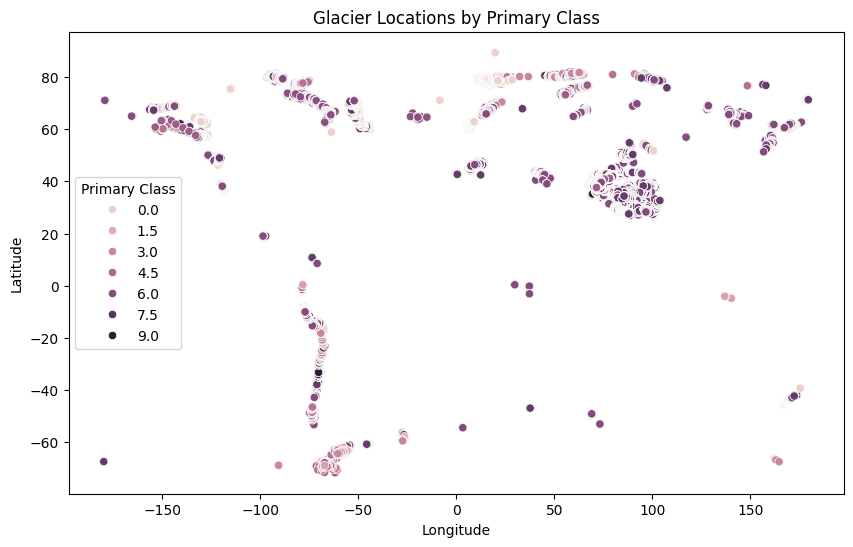

In [8]:
# Exploratory Data Analysis (EDA)
# Visualizing glacier locations on a map (latitude and longitude)
plt.figure(figsize=(10,6))
sns.scatterplot(x='Longitude', y='Latitude', hue='Primary Class', data=df)
plt.title('Glacier Locations by Primary Class')
plt.show()

In [9]:
# Feature Engineering: Converting Categorical Data into Numeric
df_encoded = pd.get_dummies(df[['Political Unit', 'Continent', 'Primary Class']], drop_first=True)

# Selecting important features for the model
features = df[['Latitude', 'Longitude']].join(df_encoded)

# Placeholder for target (Replace this with actual High Risk vs Low Risk classification)
target = np.random.choice([0, 1], size=len(df))  # Replace with actual target

# Verify the shape of features and target
print("Feature Shape: ", features.shape)
print("Target Shape: ", target.shape)

# Scale the features for better model performance
scaler = StandardScaler()
X_scaled = scaler.fit_transform(features)

# Train-Test Split
X_train, X_test, y_train, y_test = train_test_split(X_scaled, target, test_size=0.3, random_state=42)

Feature Shape:  (132890, 46)
Target Shape:  (132890,)


In [11]:
# Model Building: DecisionTreeClassifier
model = DecisionTreeClassifier(random_state=42)
model.fit(X_train, y_train)

# Prediction
y_pred = model.predict(X_test)

# Model Evaluation
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred))
print("\nClassification Report:\n", classification_report(y_test, y_pred))



# Calculate Accuracy
accuracy = accuracy_score(y_test, y_pred)
print(f"Model Accuracy: {accuracy * 100:.2f}%")

Confusion Matrix:
 [[10245  9793]
 [ 9985  9844]]

Classification Report:
               precision    recall  f1-score   support

           0       0.51      0.51      0.51     20038
           1       0.50      0.50      0.50     19829

    accuracy                           0.50     39867
   macro avg       0.50      0.50      0.50     39867
weighted avg       0.50      0.50      0.50     39867

Model Accuracy: 50.39%


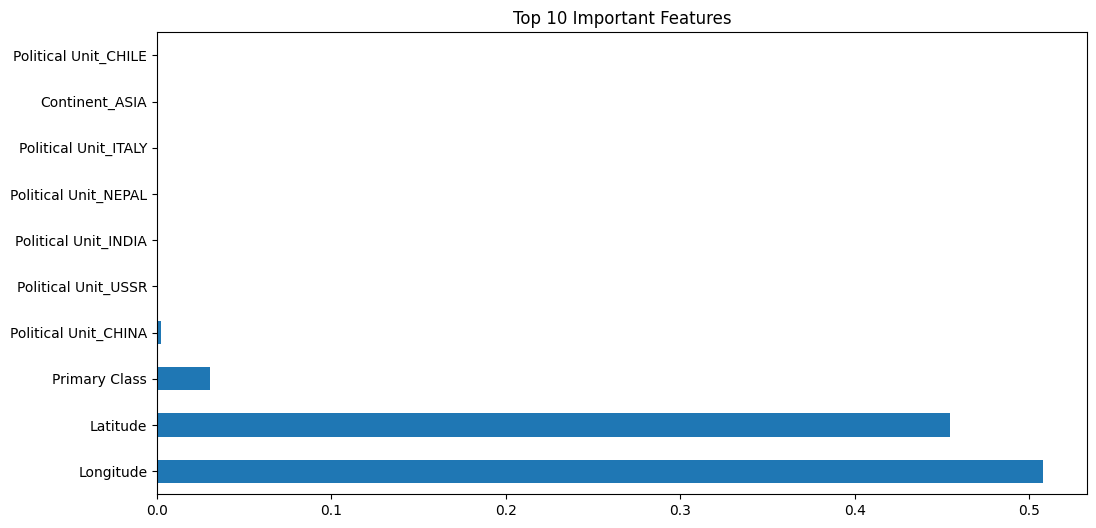

In [13]:
# Feature Importance
plt.figure(figsize=(12,6))
feature_importances = pd.Series(model.feature_importances_, index=features.columns)
feature_importances.nlargest(10).plot(kind='barh')
plt.title('Top 10 Important Features')
plt.show()